<a href="https://colab.research.google.com/github/klnsuman/DeepLearning/blob/master/0214_MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets
import numpy as np

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

In [ ]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [ ]:
import pandas as pd

In [ ]:
data  = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['class'] = breast_cancer.target

In [ ]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


##**Test Train Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('class',axis=1)
Y = data['class']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y)

In [ ]:
print(Y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.631578947368421 0.626953125


## **Binarization of input**

In [ ]:
import matplotlib.pyplot as plt


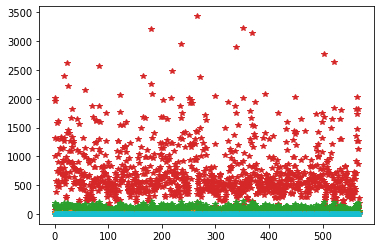

In [ ]:
plt.plot(X_train,'*')
plt.show()

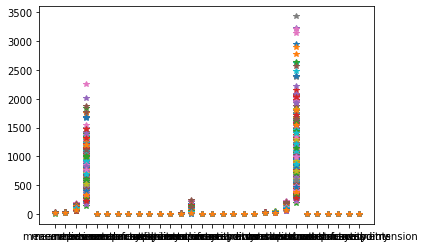

In [ ]:
plt.plot(X_train.T,'*')
plt.show()

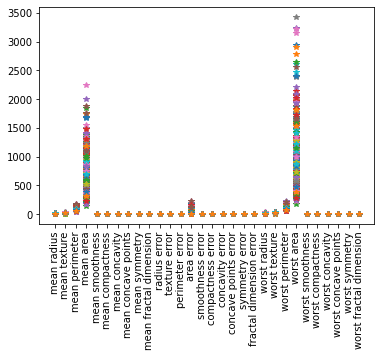

In [ ]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_3_train = X_train['mean area'].map(lambda x:0 if x<1000 else 1)

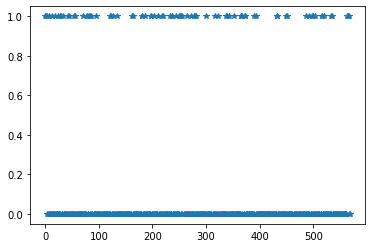

In [ ]:
plt.plot(X_binarised_3_train.T,'*')
plt.show()

In [ ]:
X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[0,1])

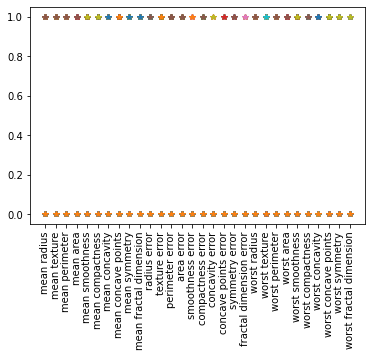

In [ ]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[0,1])

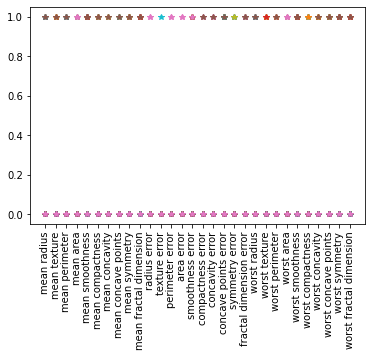

In [ ]:
plt.plot(X_binarised_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [ ]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [ ]:
type(X_binarised_train)

numpy.ndarray

## **MP Neuron Model**

In [ ]:
b = 3

i = 100
if(np.sum(X_binarised_train[100,:])>=b):
  print('MP Neron Inference is Malignant')
else:
  print('MP Neron Inference is Benign')

if(Y_train[i] == 1):
  print('Ground Truth is Malignant')
else:
  print('Ground Truth is Benign')
  

MP Neron Inference is Benign
Ground Truth is Benign


In [ ]:
b = 3
y_pred_train = []
accurate_rows = 0

for x,y in zip(X_binarised_train,Y_train):
  y_pred = (np.sum(x)>=b)
  y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)

print(accurate_rows , accurate_rows/X_binarised_train.shape[0])

76 0.1484375


In [ ]:
b = 3

for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = []
  accurate_rows = 0

  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x)>=b)
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b,accurate_rows , accurate_rows/X_binarised_train.shape[0])

0 321 0.626953125
1 127 0.248046875
2 97 0.189453125
3 76 0.1484375
4 67 0.130859375
5 75 0.146484375
6 87 0.169921875
7 105 0.205078125
8 119 0.232421875
9 133 0.259765625
10 149 0.291015625
11 154 0.30078125
12 157 0.306640625
13 165 0.322265625
14 173 0.337890625
15 179 0.349609375
16 180 0.3515625
17 183 0.357421875
18 187 0.365234375
19 188 0.3671875
20 189 0.369140625
21 191 0.373046875
22 191 0.373046875
23 191 0.373046875
24 191 0.373046875
25 191 0.373046875
26 191 0.373046875
27 191 0.373046875
28 191 0.373046875
29 191 0.373046875
30 191 0.373046875
